In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")

In [ ]:
type(train)

In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.isnull().sum(axis = 0)

In [ ]:
len(train)

In [ ]:
new_train=train.drop(['Cabin'],axis=1)
#new_train=train.drop(columns=['Cabin'])

In [ ]:
new_train=new_train.drop(['Age'],axis=1)

In [55]:
new_train.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [ ]:
new_train=new_train.dropna()

In [ ]:
new_train.isnull().sum(axis=0)

In [ ]:
new_train=new_train.drop(columns=['PassengerId','Name','Ticket','Fare'])

In [56]:
new_train.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [ ]:
new_train.describe()

In [ ]:
latest_train=new_train.Survived

In [ ]:
new_train=new_train.drop(columns=['Survived'])

In [57]:
latest_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

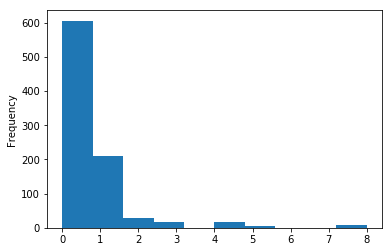

In [58]:
curve1=new_train['SibSp'].plot.hist()

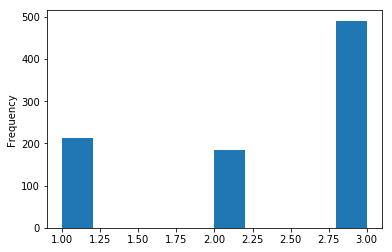

In [59]:
curve2=new_train['Pclass'].plot.hist()

In [ ]:
hot_enc_train=pd.get_dummies(new_train,columns=['Pclass','Embarked','Sex'])

In [61]:
hot_enc_train

,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Relative
0,0,0,1,0,0,1,0,1,1
1,1,0,0,1,0,0,1,0,1
2,0,0,1,0,0,1,1,0,0
3,1,0,0,0,0,1,1,0,1
4,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,1,0,1,0
887,1,0,0,0,0,1,1,0,0
888,0,0,1,0,0,1,1,0,3
889,1,0,0,1,0,0,0,1,0


In [ ]:
def new_column(row):
    return row['SibSp']+row['Parch']
hot_enc_train['Relative']=hot_enc_train.apply(new_column,axis=1)

In [ ]:
hot_enc_train=hot_enc_train.drop(columns=['SibSp','Parch'])

In [62]:
hot_enc_train

,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Relative
0,0,0,1,0,0,1,0,1,1
1,1,0,0,1,0,0,1,0,1
2,0,0,1,0,0,1,1,0,0
3,1,0,0,0,0,1,1,0,1
4,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,1,0,1,0
887,1,0,0,0,0,1,1,0,0
888,0,0,1,0,0,1,1,0,3
889,1,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(hot_enc_train,latest_train)

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,hot_enc_train,latest_train,cv=5)

In [63]:
scores

array([0.7752809 , 0.79775281, 0.78651685, 0.79213483, 0.8079096 ])

In [ ]:
test=test.drop(columns=['PassengerId','Ticket','Fare','Name','Cabin','Age'])
test=test.dropna()


In [ ]:
hot_enc_test=pd.get_dummies(test,columns=['Pclass','Embarked','Sex'])
hot_enc_test['Relative']=hot_enc_test.apply(new_column,axis=1)

In [ ]:
hot_enc_test=hot_enc_test.drop(columns=['SibSp','Parch'])

In [ ]:
output=clf.predict(hot_enc_test)

In [ ]:
output

In [ ]:
test = pd.read_csv("../input/titanic/test.csv")
df=pd.DataFrame({'PassengerId':test['PassengerId'].values,'Survived':output})
df.to_csv('Submission.csv',index=False)